# 📌 Extração

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
# importando arquivo json
import requests
import json

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# convertendo para dataframe
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [37]:
# normalizando os dados
dados_normalizados = pd.json_normalize(data)
dados_normalizados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformação

In [38]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [39]:
# valores ausentes
dados_normalizados.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [40]:
# duplicados
duplicados = dados_normalizados.duplicated().sum()
print(f"Duplicados: {duplicados}")

# remover duplicados
if duplicados > 0:
    dados_normalizados = dados_normalizados.drop_duplicates()
    print(f"Duplicados removidos! {dados_normalizados.shape}")

Duplicados: 0


In [41]:
# verifica por valores ausentes
valores_ausentes = dados_normalizados.isnull().any(axis=1).sum()
print(f"Linhas com valores ausentes: {valores_ausentes}")

# remove valores ausentes
if valores_ausentes > 0:
    dados_normalizados = dados_normalizados.dropna()
    print(f"Linhas removidas, novo tamanho: {dados_normalizados.shape}")
else:
    print("Nenhuma linha com valores ausentes encontrada!")

Linhas com valores ausentes: 0
Nenhuma linha com valores ausentes encontrada!


In [42]:
# salvar os dados prontos para analise
dados_prontos = dados_normalizados.copy()

In [43]:
# criando a coluna Contas_Diarias
dados_prontos['Gasto_Diario'] = dados_prontos['account.Charges.Monthly'] / 30
dados_prontos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Gasto_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [44]:
# traduzindo as colunas
dados_prontos.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Gasto_Diario']

In [45]:
dados_prontos = dados_prontos.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Sexo',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.PaymentMethod': 'Forma_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
})

In [46]:
dados_prontos.columns.tolist()

['ID_Cliente',
 'Cancelado',
 'Sexo',
 'Idoso',
 'Parceiro',
 'Dependentes',
 'Meses_Contrato',
 'Servico_Telefonico',
 'Multiplas_Linhas',
 'Servico_Internet',
 'Seguranca_Online',
 'Backup_Online',
 'Protecao_Dispositivo',
 'Suporte_Tecnico',
 'Streaming_TV',
 'Streaming_Filmes',
 'Tipo_Contrato',
 'Fatura_Online',
 'Forma_Pagamento',
 'Gasto_Mensal',
 'Gasto_Total',
 'Gasto_Diario']

In [47]:
dados_prontos.dropna(inplace=True)
dados_prontos.head()

,ID_Cliente,Cancelado,Sexo,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


# 📊 Carga e Análise

In [48]:
# converter Yes/No para 1/0 para calcular media
dados_prontos['Cancelado_Numero'] = dados_prontos['Cancelado'].map({'Yes': 1, 'No': 0})

In [49]:
# calculo da media
taxa_cancelamento = dados_prontos['Cancelado_Numero'].mean()

print(f"Taxa de cancelamento: {taxa_cancelamento * 100:.1f}%")

Taxa de cancelamento: 26.5%


In [65]:
dados_analise_final = dados_prontos.copy()

# substituir espacos vazios por NaN
dados_analise_final['Gasto_Total'] = dados_analise_final['Gasto_Total'].replace(' ', np.nan)

# converter para numerico
dados_analise_final['Gasto_Total'] = pd.to_numeric(dados_analise_final['Gasto_Total'], errors='coerce')

# remover NaN
print(f"Linhas antes da limpeza final de NaNs: {len(dados_analise_final)}")
dados_analise_final.dropna(inplace=True)
print(f"Linhas depois da limpeza final de NaNs: {len(dados_analise_final)}")

Linhas antes da limpeza final de NaNs: 7043
Linhas depois da limpeza final de NaNs: 7032


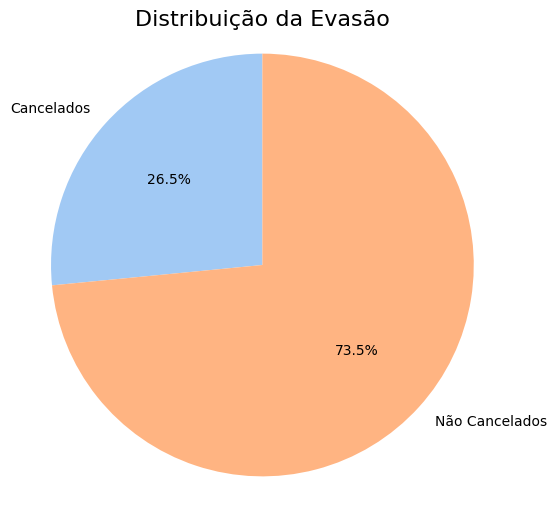

In [50]:
# calculo de  cancelamentos
cancelados_quantidade = dados_prontos['Cancelado'].value_counts()['Yes']
nao_cancelados_quantidade = dados_prontos['Cancelado'].value_counts()['No']

# grafico
data = [cancelados_quantidade, nao_cancelados_quantidade]
labels = ['Cancelados', 'Não Cancelados']
colors = sns.color_palette('pastel')[0:2]
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Distribuição da Evasão', fontsize=16)
plt.axis('equal')
plt.show()

/tmp/ipython-input-77-1628854920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-77-1628854920.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelado')


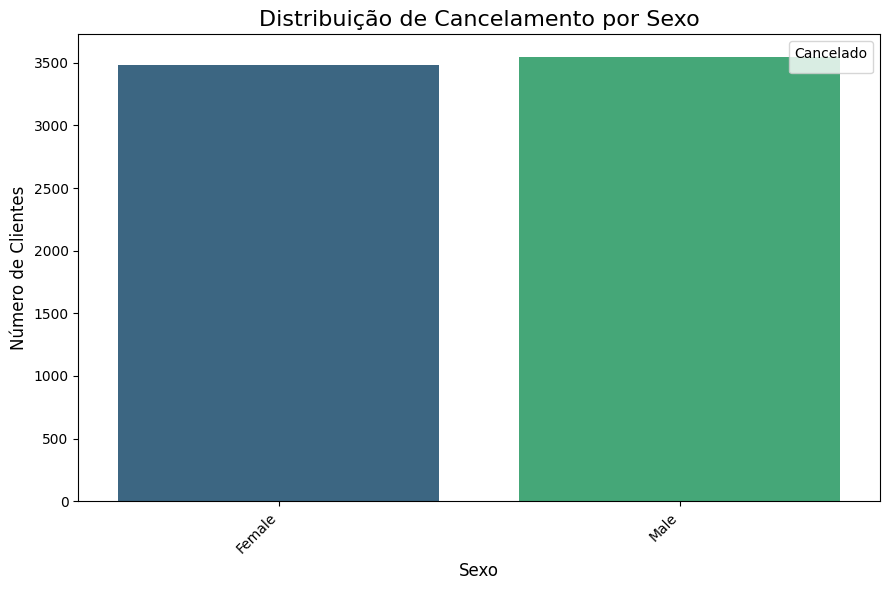

/tmp/ipython-input-77-1628854920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-77-1628854920.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelado')


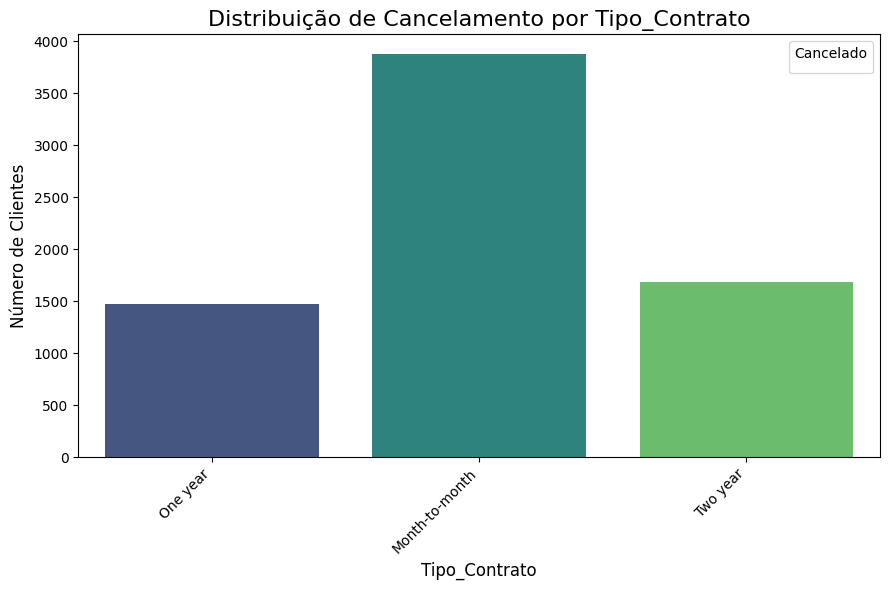

/tmp/ipython-input-77-1628854920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-77-1628854920.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelado')


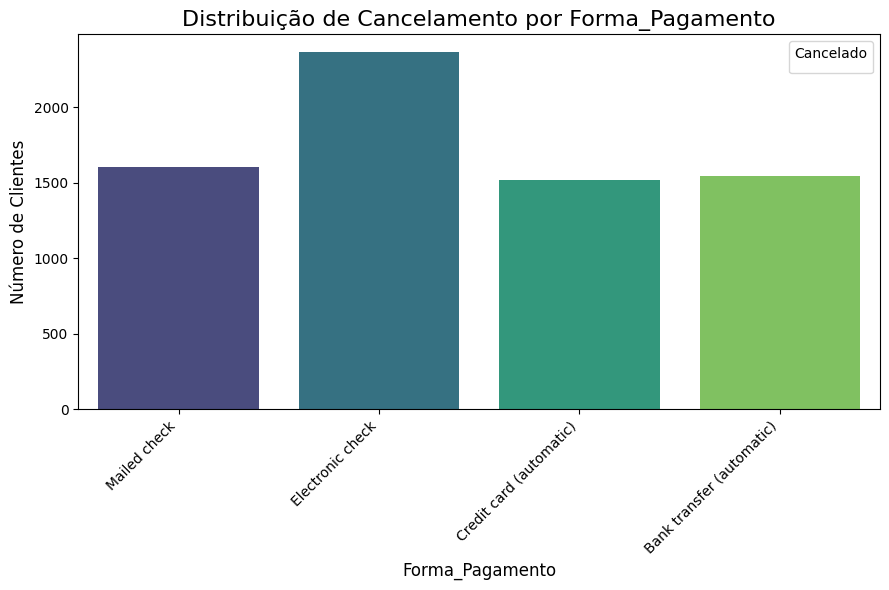

/tmp/ipython-input-77-1628854920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-77-1628854920.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelado')


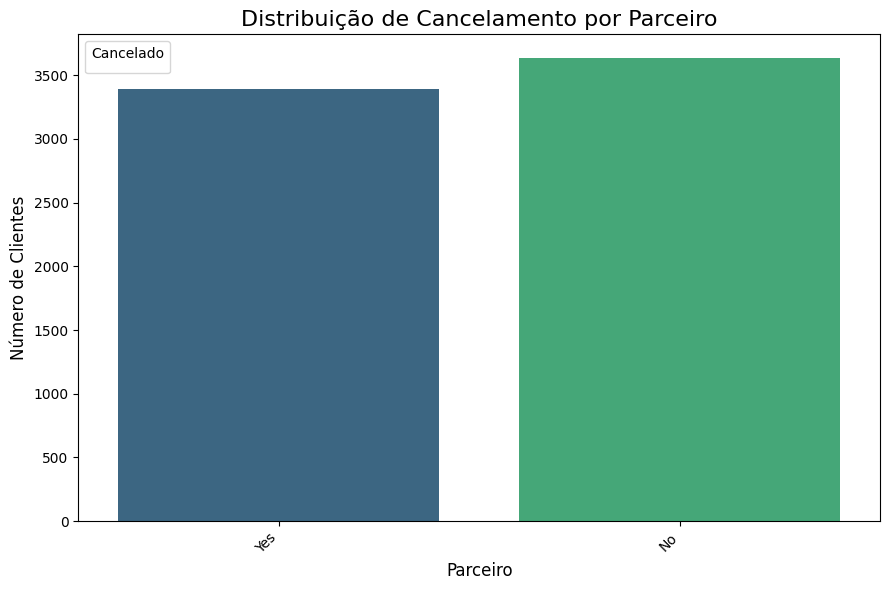

/tmp/ipython-input-77-1628854920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-77-1628854920.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelado')


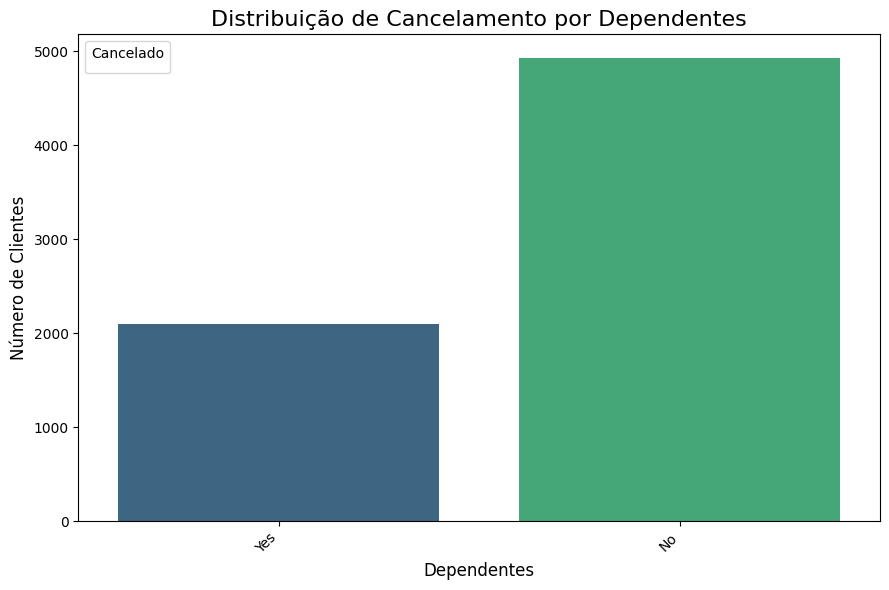

In [77]:
# lista de variaveis
variaveis_categoricas_plot = ['Sexo', 'Tipo_Contrato', 'Forma_Pagamento', 'Parceiro', 'Dependentes']

for coluna in variaveis_categoricas_plot:
    plt.figure(figsize=(9, 6))
    sns.countplot(
        data=dados_analise_final,
        x=coluna,
        palette='viridis'
    )
    plt.title(f'Distribuição de Cancelamento por {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cancelado')
    plt.tight_layout()
    plt.show()

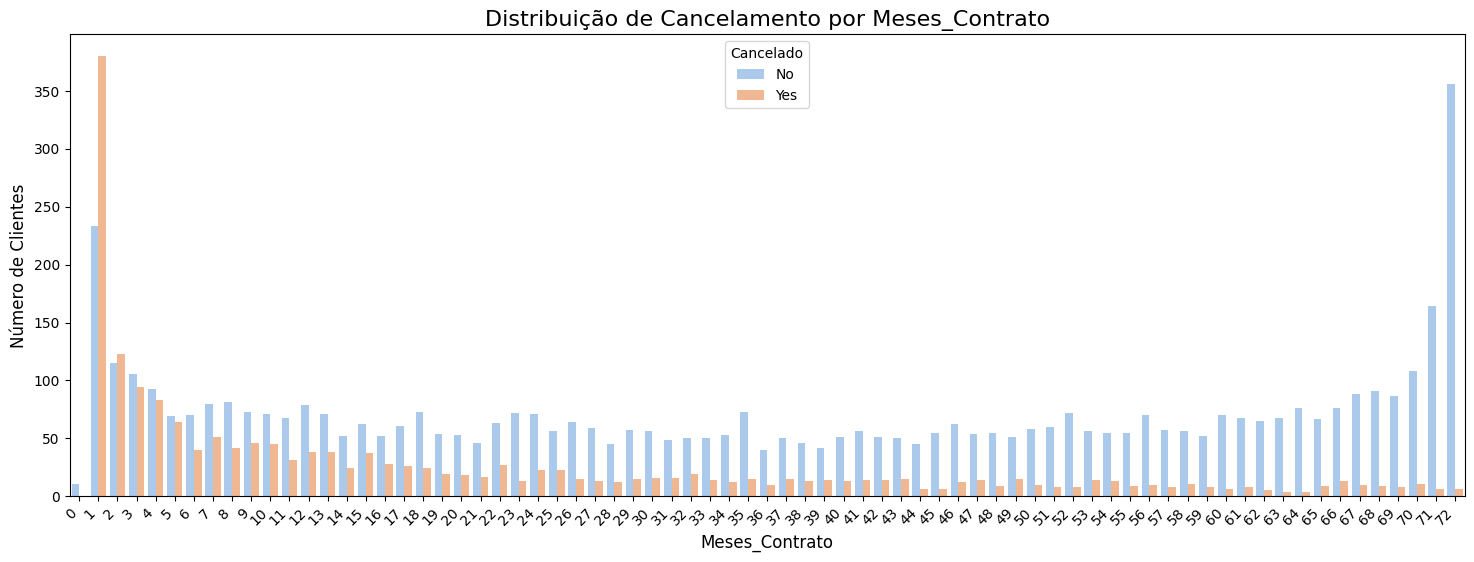

In [80]:
# lista de variaveis
variaveis_numericas = ['Meses_Contrato']

# loop para criacao dos graficos
for coluna in variaveis_numericas:
  plt.figure(figsize=(18, 6))
  sns.countplot(data=dados_prontos, x=coluna, hue='Cancelado', palette='pastel')
  plt.title(f'Distribuição de Cancelamento por {coluna}', fontsize=16)
  plt.xlabel(coluna, fontsize=12)
  plt.ylabel('Número de Clientes', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Cancelado')
  plt.show()

# 📄Relatorio Final

# Relatório Final: Análise de Evasão de Clientes - TelecomX

### 1. Introdução

Este relatório apresenta os resultados da análise de evasão de clientes na empresa TelecomX. O objetivo principal foi identificar padrões e fatores que contribuem para que os clientes cancelem seus serviços, fornecendo insights para a formulação de estratégias de retenção.

### 2. Limpeza e Tratamento de Dados

A etapa inicial da análise envolveu a importação e o tratamento de dados. Os dados foram carregados a partir de um arquivo JSON online e normalizados de forma adequada, incluindo:

* **Importação de Dados**: Os dados foram importados de uma URL via `requests` e `json`, e posteriormente convertidos para DataFrame.
* **Normalização**: A estrutura do arquivo JSON foi "normalizada" para criar um DataFrame (`dados_normalizados`), onde cada linha representa um cliente e suas respectivas características.
* **Verificação de Valores Ausentes**: Foi realizada uma inspeção para identificar e tratar possíveis valores ausentes, garantindo a integridade dos dados para análises subsequentes.
* **Verificação de Duplicados**: Foi verificada a presença de registros duplicados para assegurar a integridade dos dados.
* **Criação de Novas Features**: Uma nova coluna `Gasto_Diario` foi criada a partir dos dados existentes no DataFrame, enriquecendo o conjunto de dados para futuras análises.

### 3. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados revelou diversos padrões e correlações importantes, utilizando visualizações gráficas para melhor compreensão.

**Insights Visuais Chave:**

A partir das análises visuais, podemos destacar os seguintes pontos:

* **Taxa de Cancelamento Geral**: A taxa de cancelamento é uma métrica crítica que indica a porcentagem de clientes que descontinuam seus serviços.
* **Serviço de Internet e Contrato**: Clientes com serviço de internet de `Fiber optic` (Fibra Óptica) e contratos `Month-to-month` (Mês a Mês) apresentaram um risco de cancelamento significativamente mais alto. Isso sugere que a qualidade da conexão e a flexibilidade do contrato são fatores determinantes para tal ato.
* **Período de Permanência**: Foi observado que os primeiros 12 meses de contrato são um período crítico, com uma maior probabilidade de cancelamento. Isso indica a necessidade de estratégias de engajamento e fidelização mais intensivas nos estágios iniciais do relacionamento com o cliente.
* **Impacto Financeiro**: Clientes que cancelam tendem a ter um valor médio de `Cobranças Mensais` que impacta a receita.
